In [8]:
#menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
#memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/praktikum_ml/praktikum02/"

In [ ]:
#membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + "data/500_Person_Gender_Height_Weight_Index.csv")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
#mencari info data pada file (tipe datanya, non nul count data, nama kolom)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
#menghitung mean semua kolom numerik
df['Height'].mean()

np.float64(169.944)

In [ ]:
#menghitung median semua kolom numerik
df['Height'].median()

170.5

In [ ]:
#mencari modus (hati-hati karena bisa lebih dari satu)
df['Height'].mode()

,Height
0,188


In [ ]:
#menghitung varian & standard deviasi
df.var(numeric_only=True)

,0
Height,268.149162
Weight,1048.633267
Index,1.836168


In [ ]:
#menghitung standard deviasi
df.std(numeric_only=True)

,0
Height,16.375261
Weight,32.382607
Index,1.355053


In [ ]:
q1 = df['Height'].quantile(0.25)
print("Q1 : ", q1)

q3 = df['Height'].quantile(0.75)
print("Q1 : ", q3)

iqr = q3 - q1
print("IQR : ", iqr)



Q1 :  156.0
Q1 :  184.0
IQR :  28.0


In [ ]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
correlation_matrix = df.corr(numeric_only=True)

print("Matriks Korelasi:")
print(correlation_matrix)

Matriks Korelasi:
          Height    Weight     Index
Height  1.000000  0.000446 -0.422223
Weight  0.000446  1.000000  0.804569
Index  -0.422223  0.804569  1.000000


<Axes: >

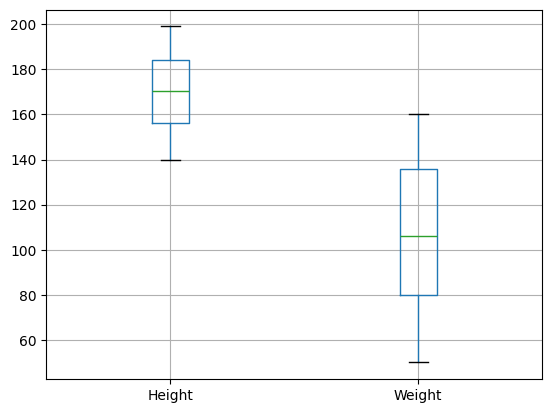

In [ ]:
import pandas as pd
import numpy as np

df.boxplot(column=['Height', 'Weight'])

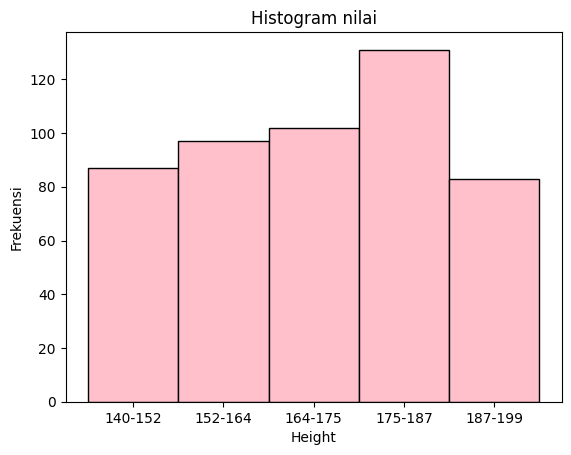

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ambil data Height
data_height = df["Height"]

# Buat histogram
n,  bins, patches = plt.hist(data_height, bins=5, color='pink', edgecolor='black')

# Tambahkan label
plt.title('Histogram nilai')
plt.xlabel('Height')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuansi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'. format(bins[i],bins[i+1]) for i in range(len(bins)-1) ])

# Tampilkan grafik
plt.show()

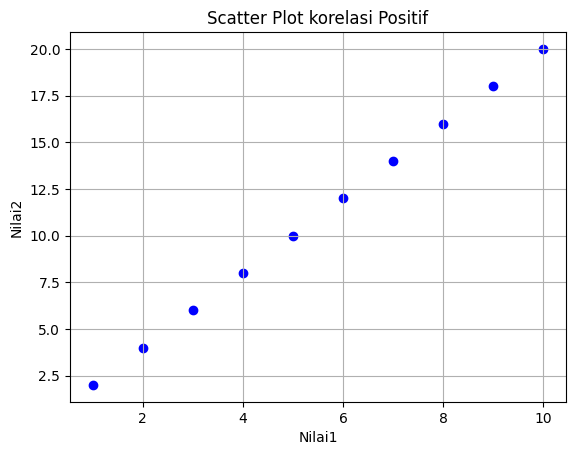

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat dataframe contoh
data = {
    'nilai1': [1,2,3,4,5,6,7,8,9,10],
    'nilai2': [2,4,6,8,10,12,14,16,18,20]
}

df2 = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df2['nilai1'], df2['nilai2'], color='blue', marker='o')

# Tambahkan label
plt.title('Scatter Plot korelasi Positif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tambahkan Grid
plt.grid(True)

# Tampilkan grafik
plt.show()

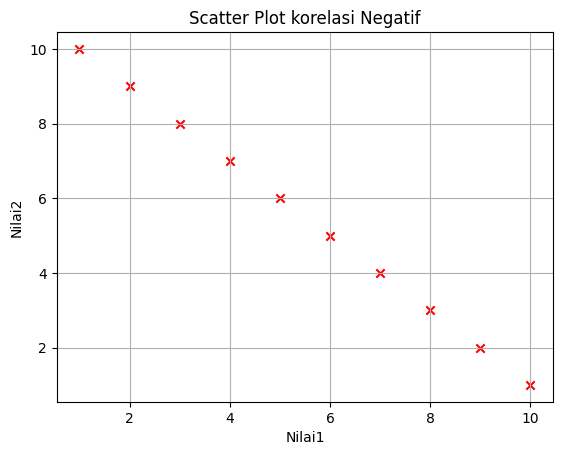

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat dataframe contoh
data = {
    'nilai1': [1,2,3,4,5,6,7,8,9,10],
    'nilai2': [10,9,8,7,6,5,4,3,2,1]
}

df3 = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df3['nilai1'], df3['nilai2'], color='red', marker='x')

# Tambahkan label
plt.title('Scatter Plot korelasi Negatif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tambahkan Grid
plt.grid(True)

# Tampilkan grafik
plt.show()

In [11]:
#membaca file csv menggunakan pandas
import pandas as pd

df2 = pd.read_csv(path + "data/day.csv")
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(
    df2,
    test_size=0.2,
    random_state=42
)

In [13]:
final_train_data, val_data = train_test_split(
    train_data,
    test_size=0.1,
    random_state=42
)

In [18]:
print("\n=== HASIL PEMBAGIAN DATASET ===")
print(f"Total Data Awal: {len(df2)}")
print(f"Training Data: {len(final_train_data)} ({len(final_train_data)/len(df2)*100:.1f}%)")
print(f"Validation Data: {len(val_data)} ({len(val_data)/len(df2)*100:.1f}%)")
print(f"Testing Data: {len(test_data)} ({len(test_data)/len(df2)*100:.1f}%)")

print("\n=== 5 BARIS TERATAS TRAINING DATA ===")
print(final_train_data.head())

print("\n=== 5 BARIS TERATAS VALIDATION DATA ===")
print(val_data.head())

print("\n=== 5 BARIS TERATAS TESTING DATA ===")
print(test_data.head())


=== HASIL PEMBAGIAN DATASET ===
Total Data Awal: 731
Training Data: 525 (71.8%)
Validation Data: 59 (8.1%)
Testing Data: 147 (20.1%)

=== 5 BARIS TERATAS TRAINING DATA ===
     instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
657      658  2012-10-19       4   1  ...   0.134954     753        4671  5424
163      164  2011-06-13       2   0  ...   0.305350     863        4157  5020
305      306  2011-11-02       4   0  ...   0.082092     370        3816  4186
111      112  2011-04-22       2   0  ...   0.219521     177        1506  1683
538      539  2012-06-22       3   1  ...   0.182842     964        4859  5823

[5 rows x 16 columns]

=== 5 BARIS TERATAS VALIDATION DATA ===
     instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
325      326  2011-11-22       4   0  ...   0.118792      69        1538  1607
410      411  2012-02-15       1   1  ...   0.181600     141        4028  4169
92        93  2011-04-03       2   0  ...   0.182213